In [94]:
#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
#5. Entrenar el modelo configurando los diferentes hiperparámetros.
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
#8. Interpretar, analizar y documentar los resultados obtenidos.

In [198]:
#Libreria necesaria, que voy a usar para este tipo de modelo (regresion lineal)
import pandas as pd  #para el manejo de datos
import numpy as np #para los calculos numericos
import seaborn as sns #para los graficos
import matplotlib.pyplot as plt #para graficos

from sklearn.preprocessing import LabelEncoder #para machine learning
from sklearn.model_selection import train_test_split #para el train y test (punto #4)
from sklearn.linear_model import LinearRegression #para el punto #5
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error 
#Para evaluar desempeño (Punto #6)

In [51]:
#Empezamos
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [53]:
df.head(21)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [55]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
#segun la tabla, me muestra algunos datos atipicos, 
#quiero verificar si el valor maximo que muestra de $8'900.000 INR, pertenece a un carro
#de marca, es decir, verificar si el precio coincide con el modelo del carro.

In [57]:
df[df['selling_price'] > 8000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner


In [ ]:
#en este caso descarto esta duda, ya que si puede costar un carro de ese modelo a esos precios

In [ ]:
#segun los datos de la tabla, nos muestra tambien algunos otros datos, 
#un carro que tiene 1km, teniendo en cuenta que son carros usados puede ser un dato atipico
#para esto use este comando:

In [59]:
df[df['km_driven'] < 100]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1312,Mahindra Quanto C6,2014,250000,1,Diesel,Individual,Manual,Second Owner


In [ ]:
#es muy raro que un carro usado solo pueda tener 1km, por lo es un dato atipico

In [ ]:
#tambien quiero verificar el valor de km altos que hay, para eso quiero ver los carros que
#tienen mas de 300,000km

In [61]:
df[df['km_driven'] > 300000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner
1674,Volkswagen Jetta 2.0 TDI Comfortline,2011,350000,312000,Diesel,Individual,Manual,Third Owner
2394,Toyota Innova 2.5 V Diesel 8-seater,2009,350000,350000,Diesel,Individual,Manual,First Owner
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner
3718,Toyota Innova 2.5 GX 8 STR BSIV,2009,420000,347089,Diesel,Dealer,Manual,First Owner
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner


In [ ]:
# En este caso también descartamos dudas sobre los autos con más de 300,000 km.
# Aunque tienen kilometraje alto, son marcas que suelen durar mucho,
# por lo que los datos se consideran válidos y no se eliminan.

In [66]:
#para evitar entonces dañar nuestros datos y analisis para mas adelante, nuestro unico dato
#atipico es del carro que tiene 1km, en este caso elimino esto antes de seguir:

df = df[df['km_driven'] > 10]

In [72]:
#RELACIONES ENTRE VARIABLES

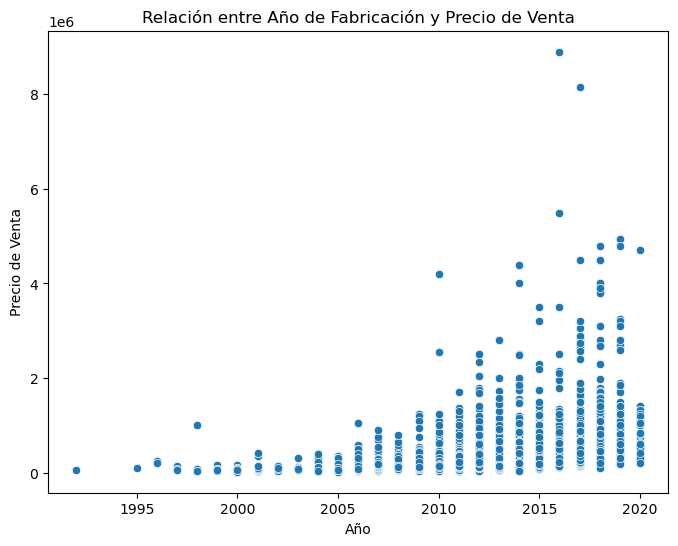

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relación entre Año de Fabricación y Precio de Venta')
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.show()

In [ ]:
# En esta gráfica podemos observar que los autos más nuevos (años recientes) tienden a tener
#precios de venta más altos, mientras que los autos más antiguos tienen precios más bajos.
# Esto confirma la tendencia esperada: a mayor año de fabricación, mayor precio de venta.

In [ ]:
#Ahora quiero ver si cuando un carro tiene mas km recorridos su precio baja, que seria lo normal

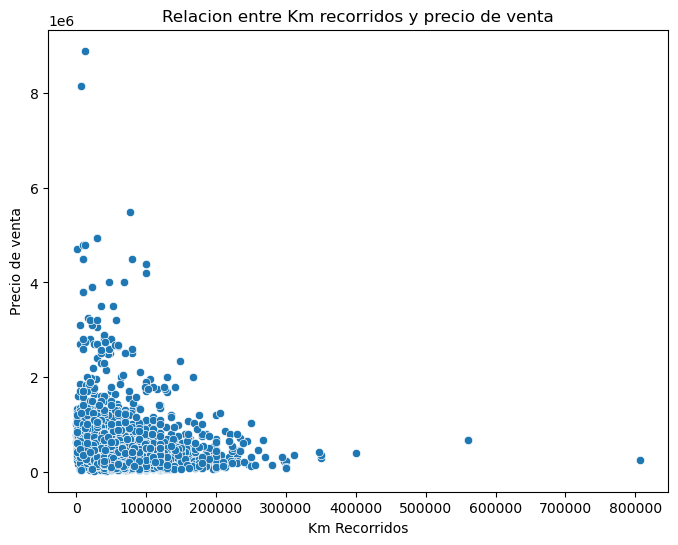

In [78]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Relacion entre Km recorridos y precio de venta')
plt.xlabel('Km Recorridos')
plt.ylabel('Precio de venta')
plt.show()

In [ ]:
# podemos observar que los autos que tienen más kilómetros recorridos tienden a tener precios 
# de venta más bajos.
# Esto confirma la tendencia lógica esperada: a mayor uso del vehículo (más km), menor es su valor de venta.

In [ ]:
#VARIABLES CATEGORICAS

# necesito analizar si el tipo de combustible (fuel) influye en el precio de venta,
# usaré un gráfico de caja (boxplot) que compara categorías con precios.

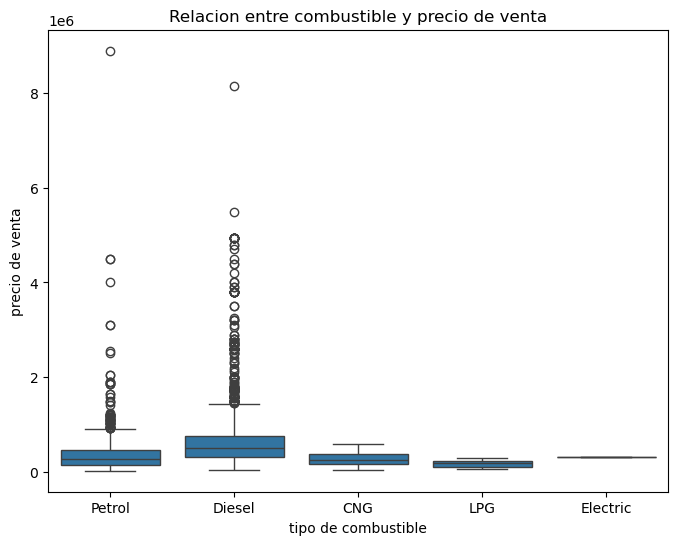

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Relacion entre combustible y precio de venta')
plt.xlabel('tipo de combustible')
plt.ylabel('precio de venta')
plt.show()

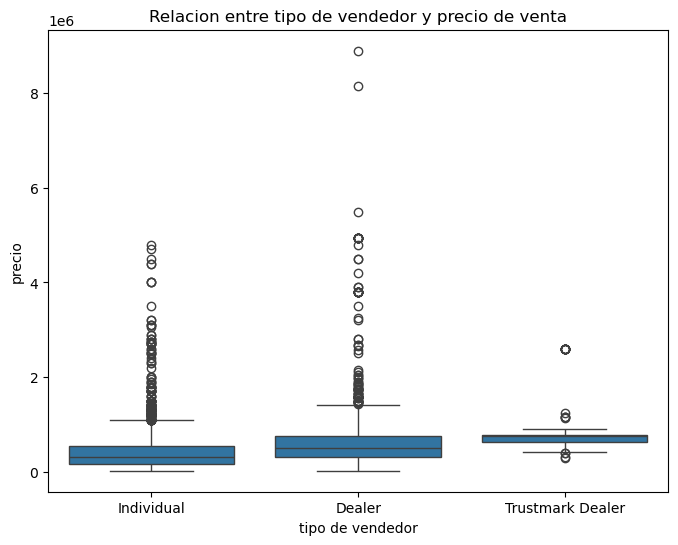

In [90]:
#Tipo de vendedor vs precio de venta

plt.figure(figsize=(8,6))
sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.title('Relacion entre tipo de vendedor y precio de venta')
plt.xlabel('tipo de vendedor')
plt.ylabel('precio')
plt.show()

In [ ]:
# Con esto observamos que los precios de los autos vendidos por dealers tienden a ser 
# ligeramente más altos que los vendidos por particulares (individual), los Trustmark Dealers 
# manejan precios más bajos en promedio.

#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos 
según sea necesario.

Como ya hice la limpieza solo me falta transformar los datos

In [99]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [119]:
#para transformar:

le = LabelEncoder()

df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])

In [123]:
df.head(21)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
5,Maruti Alto LX BSIII,2007,140000,125000,4,1,1,0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,4,1,1,0
7,Tata Indigo Grand Petrol,2014,240000,60000,4,1,1,2
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,4,1,1,0
9,Maruti Celerio Green VXI,2017,365000,78000,0,1,1,0


#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [143]:
#Eliminamos la columna 'name' ya que no mantiene una caracteristica relevante
#que nos ayude para la prediccion

In [137]:
X = df.drop(['name', 'selling_price'], axis=1) #eliminamos lo que no necesitamos
y = df['selling_price']

In [139]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,4,1,1,0
1,2007,50000,4,1,1,0
2,2012,100000,1,1,1,0
3,2017,46000,4,1,1,0
4,2014,141000,1,1,1,2


In [141]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [150]:
print(X_train)

      year  km_driven  fuel  seller_type  transmission  owner
227   2017      20000     1            1             1      0
964   2018      50000     1            1             1      0
2046  2014      90000     1            1             1      0
1025  2011      70000     1            1             1      0
4242  2017      72000     1            0             1      0
...    ...        ...   ...          ...           ...    ...
3445  2003     100000     4            1             1      2
466   2011      80000     1            1             1      0
3093  2013      22700     1            0             1      2
3773  2012      67000     0            0             1      2
860   2013      80000     4            1             1      0

[3471 rows x 6 columns]


In [152]:
print(X_test)

      year  km_driven  fuel  seller_type  transmission  owner
3977  2007      50000     4            1             1      2
1449  2012      70000     1            1             1      0
2664  2008      41723     4            1             1      2
17    2014     141000     1            1             1      2
1635  2005     100000     4            1             1      4
...    ...        ...   ...          ...           ...    ...
3468  2007      60000     4            1             1      4
2645  2007     120000     4            1             1      4
416   2011      40000     1            1             1      2
1617  2017      32077     1            2             1      0
3913  2010      90000     4            1             1      2

[868 rows x 6 columns]


#5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [159]:
modelo = LinearRegression()

In [161]:
modelo.fit(X_train, y_train)

LinearRegression()

In [163]:
X_test.head(21)

,year,km_driven,fuel,seller_type,transmission,owner
3977,2007,50000,4,1,1,2
1449,2012,70000,1,1,1,0
2664,2008,41723,4,1,1,2
17,2014,141000,1,1,1,2
1635,2005,100000,4,1,1,4
881,2012,19077,4,1,1,2
134,2015,14272,4,0,1,0
2339,2014,90000,1,1,1,0
1993,2007,60000,4,1,1,4
3135,2016,70000,1,1,1,0


In [167]:
y_pred = modelo.predict(X_test)

##6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, 
recall, F1-score, etc.

In [ ]:
# Este modelo es de regresión lineal, por lo tanto no se utilizan métricas de clasificación 
# como precisión, recall o F1-score.
# En problemas de regresión usamos métricas como MAE, MSE, RMSE y R² para evaluar el desempeño 
# el modelo.

In [200]:
y_pred = modelo.predict(X_test)

In [202]:
# Evaluamos el modelo con métricas de regresión
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimimos los resultados
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Error Absoluto Medio (MAE): 221957.82885241287
Error Cuadrático Medio (MSE): 133761215853.57593
Raíz del Error Cuadrático Medio (RMSE): 365733.80463607126
R2 Score: 0.4249361469526127


#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

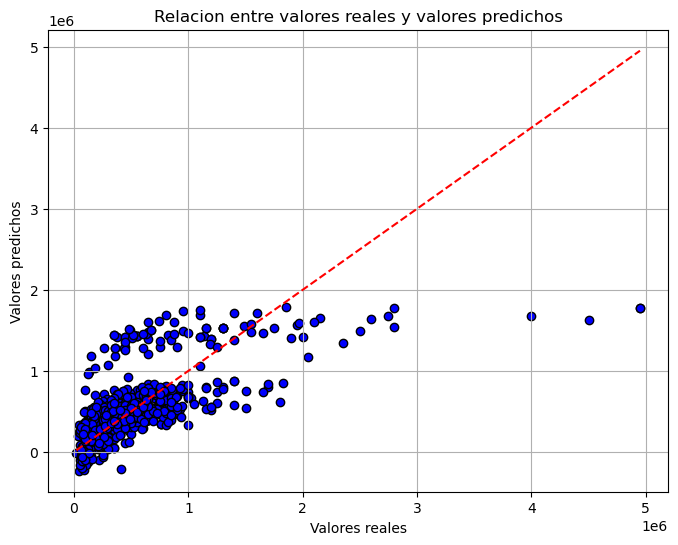

In [205]:
#GRAFICO DE DISPERSION: 

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Relacion entre valores reales y valores predichos')
plt.grid(True)
plt.show()

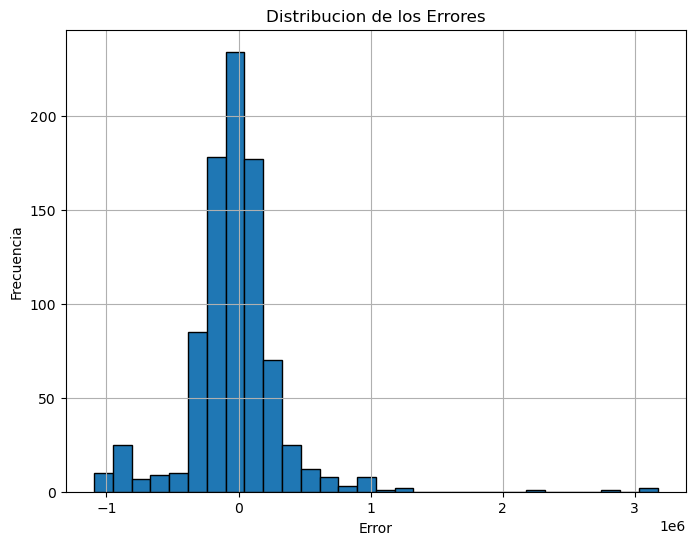

In [209]:
#para el histograma de errores, primero calculamos los errores

errors = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribucion de los Errores')
plt.grid(True)
plt.show()

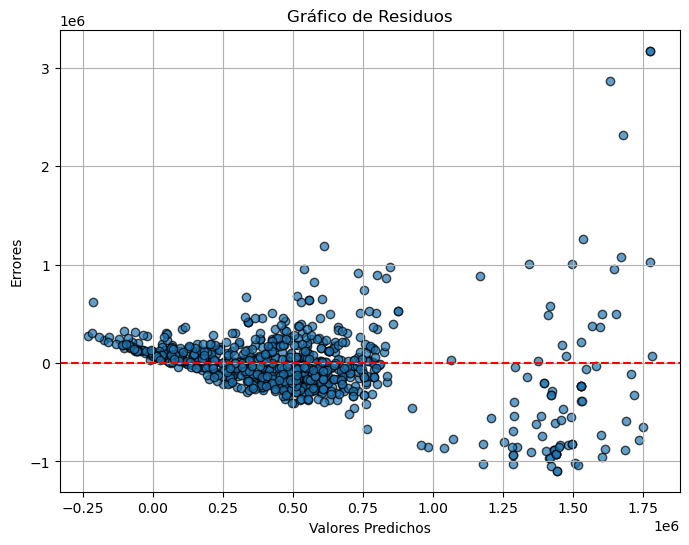

In [211]:
#GRAFICO DE RESIDUOS
plt.figure(figsize=(8,6))
plt.scatter(y_pred, errors, edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Errores')
plt.title('Gráfico de Residuos')
plt.grid(True)
plt.show()

#8. Interpretar, analizar y documentar los resultados obtenidos.

Segun el desempeño del modelo de regresesion que se hizo podemos decir que:

- En el Error absoluto medio (MAE): con el objetivo de saber cuanto se equivoca en promedio el modelo, podemos ver que nos da un error de mas o menos 221,958 (INR - rupias indias), osea, el modelo se equivoca en esa cantidad al predecir el precio de venta de los autos.
- Para el Error cuadrativo medio (MSE): es de 133,761,215,853, indicando que existen algunos errores grandes, ya que el MSE penaliza más los errores altos.
- Raiz del Error cuadratico medio (RMSE): nos dice que el error promedio es como de 365,734, que es una forma de ver que los errores grandes pesan mas.
- R² Score: nos ayuda a la calificacion del modelo, en este caso nuestro valor fue de 0,42, eso quiere decir que el modelo solo entiende el 42% de lo que pasa en los precios. No es una super nota, pero tampoco esta mal, sirve.


Segun los graficos:

- El primer Grafico de dispersion: nos muestra que las predicciones siguen la tendencia de los precios reales, aunque con cierta variabilidad.
- El Histograma de errores: nos indico que la mayoria de los errores fueron pequeños, pero existieron algunos errores grandes.
- Por ultimo, Grafico de Residuos: aqui revela que los errores fueron mayores para precios de venta altos, lo que sugiere areas donde el modelo puede mejorar.